In [3]:
import os
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

if os.name =='nt':
    font_family="Malgun Gothic"
else:
    font_family="AppleGothic"
sns.set(font=font_family,rc={"axes.unicode_minus":False})

norm =stats.norm(loc=70,scale=10)

In [4]:
s_x = np.linspace(-10,150,2000)

s_pdf= norm.pdf(s_x)

In [6]:
##확률 밀도함수 계산
mu=70
sigma = 10
s_pdf_cal = (1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(s_x-mu)**2)/(2*sigma**2))

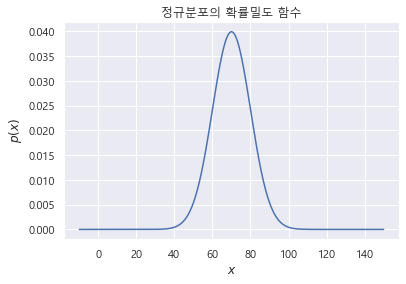

In [7]:
plt.plot(s_x,s_pdf)
plt.title("정규분포의 확률밀도 함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

In [12]:
s_cdf = norm.cdf(s_x)

from scipy.special import erf
s_cdf_cal=0.5*(1+erf((s_x-mu)/(np.sqrt(2*sigma**2))))

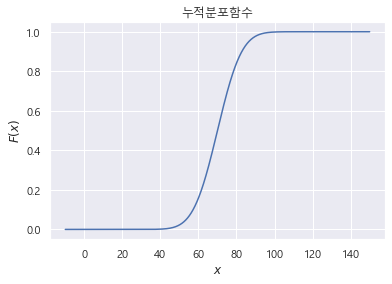

In [13]:
plt.plot(s_x,s_cdf)
plt.title("누적분포함수")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.show()

In [14]:
n_data = np.random.randint(1,100,size=1000)
n_data = np.sort(n_data)

In [15]:
n_data.shape

(1000,)

In [16]:
n_mean = np.mean(n_data)
print('Mean:',np.mean(n_data))

n_std = np.std(n_data)
print('standard deviation:',np.std(n_data))

Mean: 50.37
standard deviation: 28.865326951205663


In [17]:
norm_n_data = stats.norm(loc=n_mean,scale=n_std)

n_pdf = norm_n_data.pdf(n_data)

In [18]:
n_data.shape

(1000,)

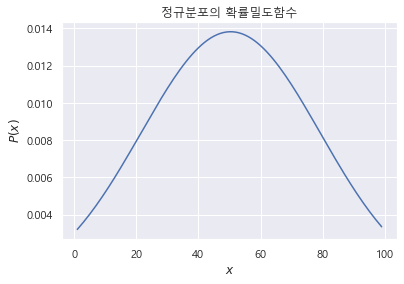

In [19]:
plt.plot(n_data,n_pdf)
plt.title("정규분포의 확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$P(x)$")
plt.show()

In [20]:
z_data = list(n_data)
z_data_list=[]
for i in z_data:
    z=(i-n_mean)/n_std
    z_data_list.append(z)
    

In [21]:
norm_z_data = stats.norm(loc=0,scale=1)
z_pdf=norm_z_data.pdf(z_data_list)

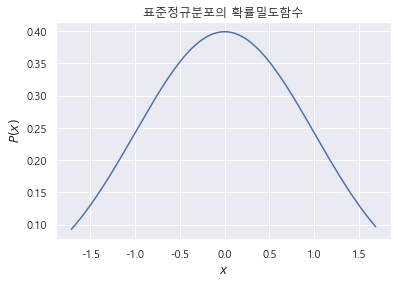

In [22]:
plt.plot(z_data_list,z_pdf)
plt.title("표준정규분포의 확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$P(x)$")
plt.show()

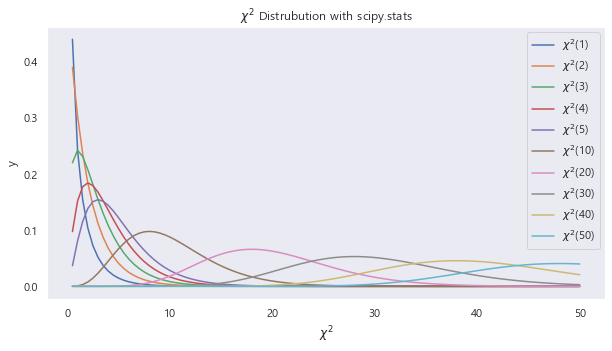

In [27]:
from scipy.stats import chi2

Chi_X = np.linspace(0.5,50,100)

plt.figure(figsize=(10,5))
for dof in [1,2,3,4,5,10,20,30,40,50]:
    plt.plot(Chi_X,stats.chi2(dof).pdf(Chi_X),
            label=r'$\chi^2$(' + str(dof)+ ')')
    
plt.xlabel(r'$\chi^2$')
plt.ylabel('y')
plt.grid()
plt.title(r'$\chi^2$ Distrubution with scipy.stats')
plt.legend()
plt.show()

In [30]:
x_o = [324,78,261]
x_e = [371,80,212]

x_crosstab = pd.DataFrame([x_o,x_e],
                         columns = ['서울','인천','대구'],
                          index = ['관찰도수','기대도수'])

In [31]:
x_crosstab

,서울,인천,대구
관찰도수,324,78,261
기대도수,371,80,212


In [32]:
from scipy.stats import chisquare

result = chisquare(x_o,f_exp=x_e)
result

Power_divergenceResult(statistic=17.329649595687332, pvalue=0.00017254977751013492)

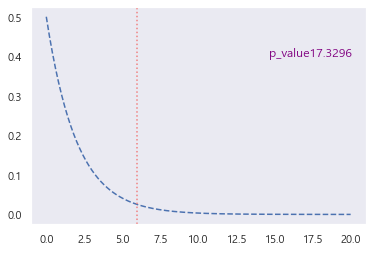

In [33]:
from scipy.stats import chi2

dof = 2
x_chi_l = np.linspace(0,20,201)
pdf_chi = chi2(dof).pdf(x_chi_l)

x95_c = chi2(dof).ppf(.95)
plt.plot(x_chi_l,pdf_chi,'b--')

plt.axvline(x=x95_c,color='lightcoral',linestyle=':')
plt.text(result[0], .4,'p_value'+str(round(result[0],4)),
        horizontalalignment='center',color='purple')
plt.grid()
plt.show()